# Segmentation

Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. Customers in the same subsets are expected to have familiar behavioral patterns

In [1]:
#Load packages
print(__doc__)
%matplotlib inline
import time

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Automatically created module for IPython interactive environment


In [4]:
#Load data
df_train = pd.read_csv('..../Transactions.csv')

print(df_train.head())

   Customer_ID  Category_1  Category_2  Category_3  Category_4  Category_5  \
0      1007727      165.97      180.84      145.85       20.20       16.52   
1      1013989      129.20      189.21       98.14        1.05        1.39   
2      1014544      126.41      153.14         NaN       74.03      106.53   
3      1022560      150.60      259.20       96.72       28.28       21.34   
4      1026878      215.30       70.25      368.51       44.02       39.03   

   Category_6  
0         NaN  
1        0.24  
2         NaN  
3         NaN  
4         NaN  


In [5]:
#Examine data
print(df_train.describe())

        Customer_ID    Category_1    Category_2    Category_3    Category_4  \
count  2.500000e+04  24840.000000  24397.000000  20006.000000  24192.000000   
mean   5.035996e+07    201.542572    273.615216    206.641346     44.794671   
std    2.857235e+07    206.348262    649.180535    262.600508     58.728076   
min    1.007727e+06     41.930000     22.310000   -213.380000      0.010000   
25%    2.554748e+07    139.840000     66.050000     69.410000     11.360000   
50%    5.040117e+07    169.480000    105.480000    184.200000     31.855000   
75%    7.498871e+07    208.332500    187.020000    276.472500     68.522500   
max    9.999723e+07   6720.000000  21037.920000  13000.730000   1419.410000   

         Category_5    Category_6  
count  24192.000000  10502.000000  
mean      44.916350     48.376153  
std       58.964072     70.758620  
min        0.010000    -28.020000  
25%       11.280000     11.352500  
50%       31.830000     29.845000  
75%       68.320000     68.785000  


In [6]:
#Replace missing values with zero
df_train.fillna(0,inplace = True)
print(df_train.head())

   Customer_ID  Category_1  Category_2  Category_3  Category_4  Category_5  \
0      1007727      165.97      180.84      145.85       20.20       16.52   
1      1013989      129.20      189.21       98.14        1.05        1.39   
2      1014544      126.41      153.14        0.00       74.03      106.53   
3      1022560      150.60      259.20       96.72       28.28       21.34   
4      1026878      215.30       70.25      368.51       44.02       39.03   

   Category_6  
0        0.00  
1        0.24  
2        0.00  
3        0.00  
4        0.00  


In [7]:
#Examine data after remove missing values
print(df_train.describe())

        Customer_ID    Category_1    Category_2    Category_3    Category_4  \
count  2.500000e+04  25000.000000  25000.000000  25000.000000  25000.000000   
mean   5.035996e+07    200.252700    267.015617    165.362671     43.346907   
std    2.857235e+07    206.313828    642.675817    249.016958     58.311832   
min    1.007727e+06      0.000000      0.000000   -213.380000      0.000000   
25%    2.554748e+07    139.057500     63.820000     26.807500     10.150000   
50%    5.040117e+07    169.120000    103.385000    140.665000     29.885000   
75%    7.498871e+07    207.865000    184.235000    248.435000     66.840000   
max    9.999723e+07   6720.000000  21037.920000  13000.730000   1419.410000   

         Category_5    Category_6  
count  25000.000000  25000.000000  
mean      43.464653     20.321854  
std       58.544755     51.703686  
min        0.000000    -28.020000  
25%       10.150000      0.000000  
50%       30.230000      0.000000  
75%       66.732500     21.740000  


It looks there are some negative amounts of purchases, it may be like return transactions. We need to handle these type of transactions. To do this, i am going to delete them

In [8]:
#Examine negative values
negative_cells = df_train<0
print(negative_cells.sum())

Customer_ID    0
Category_1     0
Category_2     0
Category_3     8
Category_4     0
Category_5     0
Category_6     2
dtype: int64


In [9]:
df_train = df_train[negative_cells.sum(axis=1) < 1]
np.shape(df_train)

(24990, 7)

In [10]:
#Total spending for each category
df_sum = df_train[['Category_' + str(i) for i in [1,2,3,4,5,6]]].sum(axis=1)
print(df_sum.head())

0    529.38
1    419.23
2    460.11
3    556.14
4    737.11
dtype: float64


In [11]:
#Examine total spendings
print(df_sum.describe())

count    24990.000000
mean       739.844055
std        992.083641
min         25.030000
25%        350.267500
50%        563.540000
75%        773.285000
max      29165.580000
dtype: float64


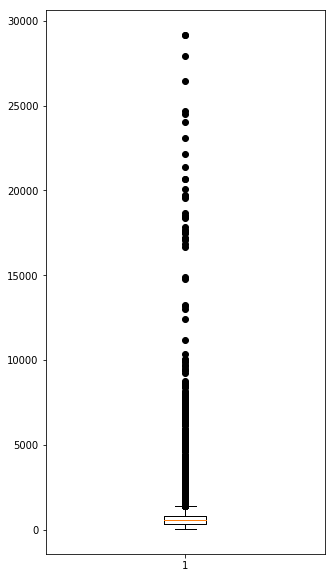

In [12]:
# Box plot of total spendings
plt.figure(figsize=(5,10))
plt.boxplot(x=df_sum.values, sym='ko')
plt.show()

Boxplot shows us there are some outliers in data. Let's find them and decide how to eliminate outliers

In [13]:
#Find percentile values for total spendings
print(df_sum.min())
print(np.percentile(df_sum, 90))
print(np.percentile(df_sum, 95))
print(np.percentile(df_sum, 99))
print(df_sum.max())

25.03
1509.196000000001
1958.8994999999998
2732.7317000000003
29165.580000000005


Maximum amount is 29165 but percentiles demonstrate that %99 of customers spend less than 2700. We can eliminate these customers to examine better picture of the customers

In [14]:
df_train['sum'] = df_sum

df_train = df_train[df_train['sum'] <= np.percentile(df_train['sum'], 99)]
df_train = df_train[df_train['sum'] >0]

#Examine data after eliminate outliers
print(df_train.describe())

        Customer_ID    Category_1    Category_2    Category_3    Category_4  \
count  2.474000e+04  24740.000000  24740.000000  24740.000000  24740.000000   
mean   5.035127e+07    185.061174    238.808747    150.784874     40.060982   
std    2.857101e+07     95.982992    377.869486    134.756991     34.824503   
min    1.007727e+06      0.000000      0.000000      0.000000      0.000000   
25%    2.552414e+07    138.657500     63.510000     26.617500     10.050000   
50%    5.038503e+07    168.670000    102.615000    138.830000     29.470000   
75%    7.497713e+07    205.755000    180.620000    245.750000     65.770000   
max    9.999723e+07   1891.280000   2096.040000    645.020000    178.850000   

        Category_5    Category_6           sum  
count  24740.00000  24740.000000  24740.000000  
mean      40.14716     18.624725    673.487662  
std       35.08454     34.575839    479.860914  
min        0.00000      0.000000     25.030000  
25%       10.05000      0.000000    346.622

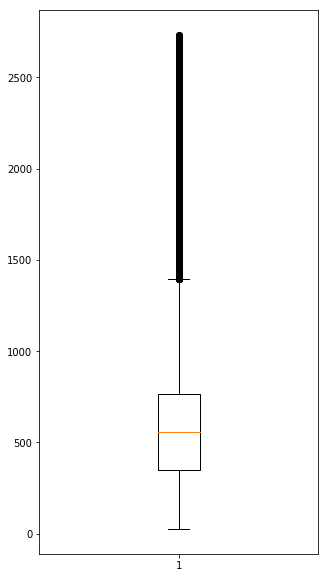

In [15]:
#After outlier detection, let's see how graph will look like
plt.figure(figsize=(5,10))
plt.boxplot(df_train['sum'].values, sym='ko')
plt.show()

Correlation matrix and heatmap plot helps us to see correlations between product categories. As we now at the beginning we had 6 categories, time to see correlations between them.

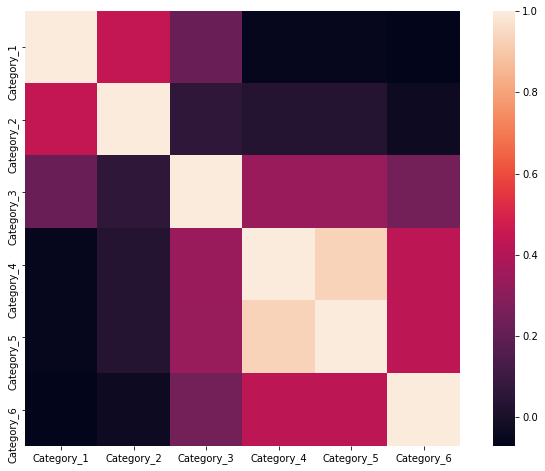

In [20]:
#Category columns
col_cat = [ u'Category_1', u'Category_2', u'Category_3', u'Category_4', u'Category_5', u'Category_6']

df_train_cat = df_train[col_cat]

#Calculate correlation matrix
corr_matrix = df_train_cat.corr()

#Use seaborn for heatmap plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,square=True)
plt.show()

Heatmap shows us some significant details about product categories. For instance Category1 and Category6 are negatively correlated. On the other hand Category4 and Category5 have strong positive correlation, they might have similar product types.

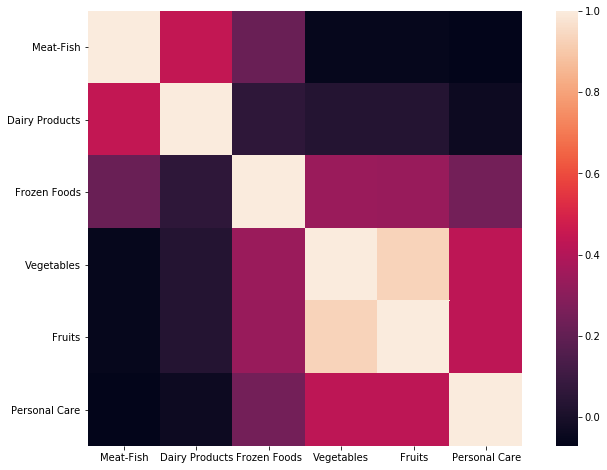

In [21]:
df_train_cat.columns = ['Meat-Fish','Dairy Products','Frozen Foods','Vegetables','Fruits','Personal Care']

#Calculate correlation matrix
corr_matrix = df_train_cat.corr()

#Use seaborn for heatmap plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,square=True)
plt.show()

Time to discover categories and discuss output. As we know that Category4 and Category5 are similar product type, let's think of these two categories as the same category. Now we have 5 different product categories.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


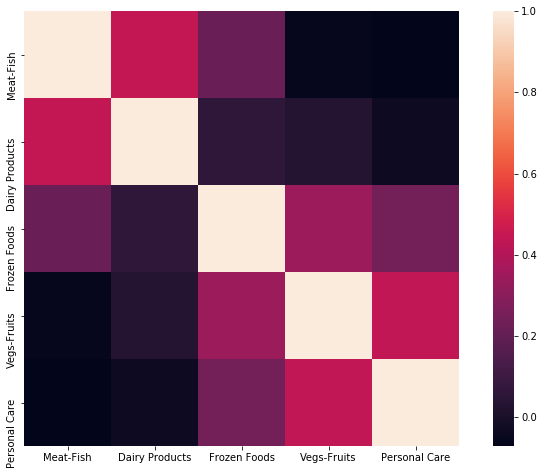

In [22]:
#Merge Category4 and Category5
df_train_cat['Vegs-Fruits'] = df_train_cat['Vegetables'] + df_train_cat['Fruits']

df_train_cat.drop(['Vegetables', 'Fruits'], axis=1, inplace=True)
df_train_cat = df_train_cat[['Meat-Fish', 'Dairy Products', 'Frozen Foods', 'Vegs-Fruits', 'Personal Care']]

#Calculate correlation matrix
corr_matrix = df_train_cat.corr()

#Use seaborn for heatmap plot
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,square=True)
plt.show()

# Gaussian Mixture Model
In statistics, a mixture model is a probabilistic model for representing the presence of subpopulations within an overall population, without requiring that an observed data set should identify the sub-population to which an individual observation belongs.

You may find more info and mathematical representation;

https://en.wikipedia.org/wiki/Mixture_model#Gaussian_mixture_model

In [23]:
#Get floating divison of dataframe
df_train_norm = df_train_cat.div(df_train_cat.sum(axis=1), axis=0)
df_train_norm.head()

,Meat-Fish,Dairy Products,Frozen Foods,Vegs-Fruits,Personal Care
0,0.313518,0.341607,0.275511,0.069364,0.000000
1,0.308184,0.451327,0.234096,0.005820,0.000572
2,0.274739,0.332833,0.000000,0.392428,0.000000
3,0.270795,0.466070,0.173913,0.089222,0.000000
4,0.292087,0.095305,0.499939,0.112670,0.000000


In [24]:
#Import Gaussian Mixture package
from sklearn.mixture import GaussianMixture

# We had 5 components
gausmix = GaussianMixture(n_components=5, random_state=0)
gausmix.fit(df_train_norm)
means = gausmix.means_

print(means)

[[0.29015861 0.13241512 0.44802081 0.10421147 0.02519399]
 [0.34219989 0.44175854 0.15138349 0.05275455 0.01190353]
 [0.1724677  0.68490171 0.08899231 0.04640947 0.00722881]
 [0.6386229  0.19397973 0.0850796  0.07291302 0.00940476]
 [0.22096317 0.16978661 0.25034784 0.29319312 0.06570926]]


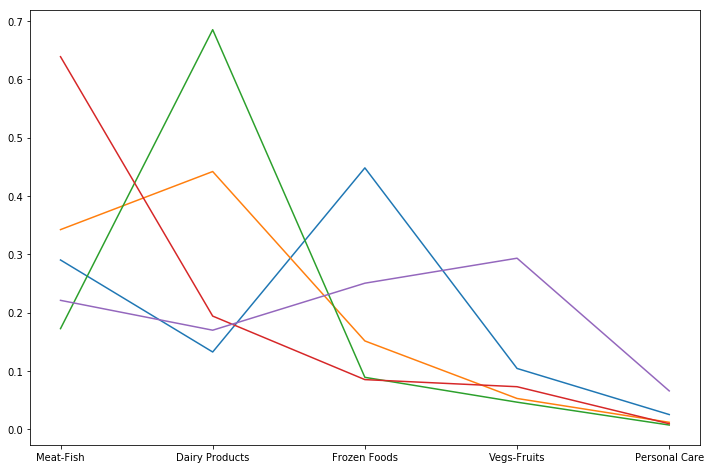

In [25]:
#Plot means for components
plt.figure(figsize=(12,8))
plt.plot(means.transpose())

plt.xticks(np.arange(5), df_train_norm.columns)
plt.show()

To see basic idea of gaussian mixture model, let's work with customer with index 1

In [26]:
[df_train_norm.iloc[1,:]][0]

Meat-Fish         0.308184
Dairy Products    0.451327
Frozen Foods      0.234096
Vegs-Fruits       0.005820
Personal Care     0.000572
Name: 1, dtype: float64

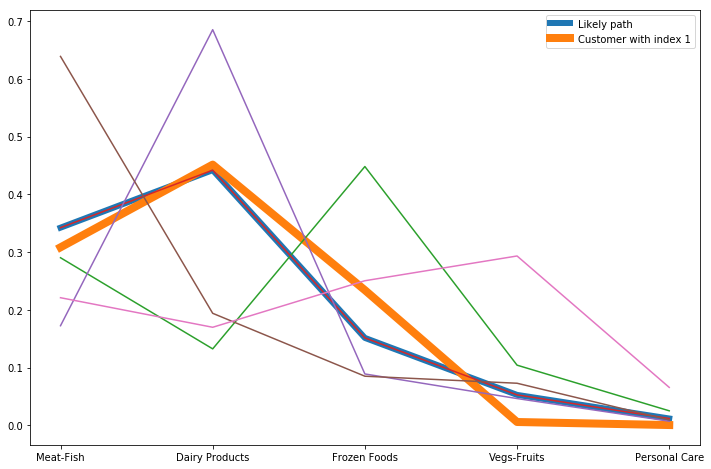

In [27]:
#Prediction of most likely path for customer with index 1
path = gausmix.predict([df_train_norm.iloc[1,:]])[0]

plt.figure(figsize=(12,8))           
plt.plot(means[path,:].transpose(), linewidth=6, label = 'Likely path')
plt.plot(df_train_norm.iloc[1,:].values, linewidth = 8, label='Customer with index 1')
plt.plot(means.transpose())
plt.xticks(np.arange(5), df_train_norm.columns)
plt.legend()
plt.show()

How it looks for customer with index 15

In [28]:
[df_train_norm.iloc[15,:]][0]

Meat-Fish         0.251205
Dairy Products    0.199978
Frozen Foods      0.276582
Vegs-Fruits       0.272235
Personal Care     0.000000
Name: 16, dtype: float64

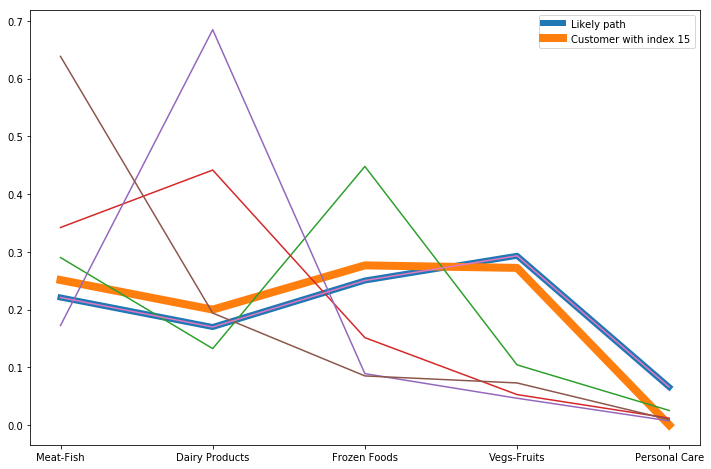

In [29]:
path = gausmix.predict([df_train_norm.iloc[15,:]])[0]

plt.figure(figsize=(12,8))           
plt.plot(means[path,:].transpose(), linewidth=6, label = 'Likely path')
plt.plot(df_train_norm.iloc[15,:].values, linewidth = 8, label='Customer with index 15')
plt.plot(means.transpose())
plt.xticks(np.arange(5), df_train_norm.columns)
plt.legend()
plt.show()
